# External AC Sensor Calibration

In [1]:
from oct2py import octave as oc
import logging
oc.addpath('m-files')
oc.logger.setLevel(logging.WARN)

## Load data

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

%pylab inline

pylab.rcParams['figure.figsize'] = (14.0, 10.0)

Populating the interactive namespace from numpy and matplotlib


In [3]:
# data from text
V_BITS = 0
C_BITS = 1
V_MEAS = 2
C_MEAS = 3

sensors = {}
for fName in os.listdir('data'):
    sensors[fName] = np.loadtxt('data/{}'.format(fName), skiprows=1)
    
all_sensors = np.concatenate(sensors.values())

## Initial Look

We can get a quick sense of how the measured values compare to the sensor values:

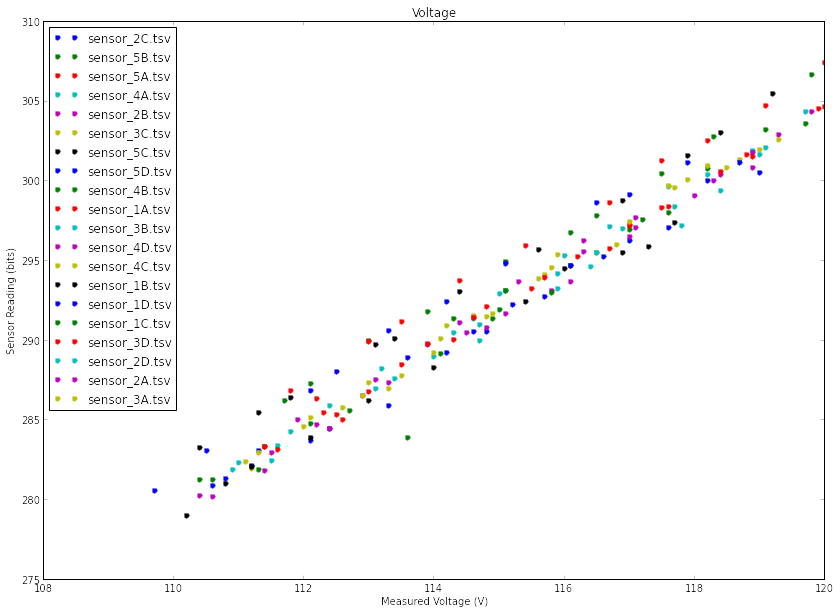

In [4]:
plt.hold(True)
plt.title('Voltage')
plt.xlabel('Measured Voltage (V)')
plt.ylabel('Sensor Reading (bits)')
for s in sensors:
    plt.plot(sensors[s][:,V_MEAS], sensors[s][:,V_BITS], '.', label=s, markersize=10)
plt.legend(loc="upper left")
plt.hold(False)
plt.show()

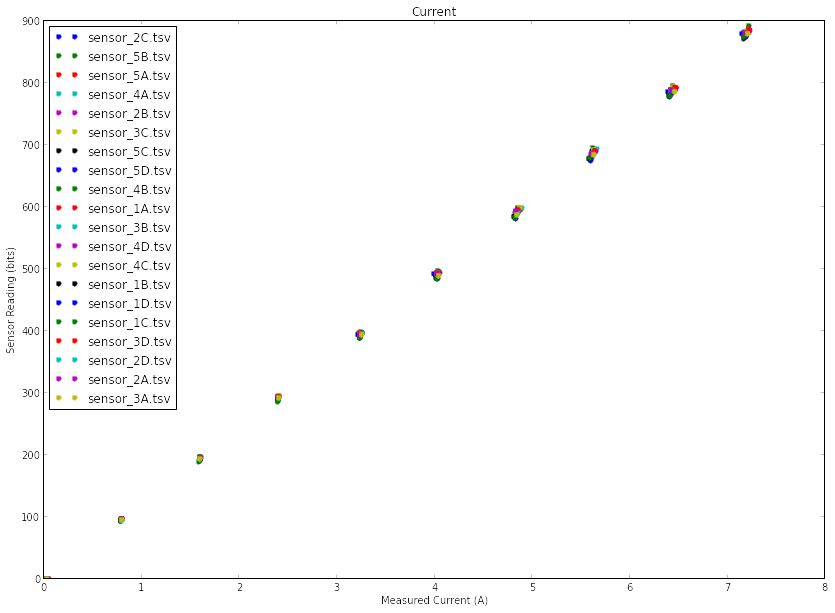

In [5]:
plt.hold(True)
plt.title('Current')
plt.xlabel('Measured Current (A)')
plt.ylabel('Sensor Reading (bits)')
for s in sensors:
    plt.plot(sensors[s][:,C_MEAS], sensors[s][:,C_BITS], '.', label=s, markersize=10)
plt.legend(loc="upper left")
plt.hold(False)
plt.show()

In [6]:
sensorVals = all_sensors[:, V_BITS]
voltageReadings = all_sensors[:, V_MEAS].T
X_v, theta_v, h_v = oc.optimizeLinearModel(sensorVals, voltageReadings)
print("theta_1: {}\ntheta_2: {}".format(float(theta_v[0]), float(theta_v[1])))

theta_1: 2.62380140699
theta_2: 0.384355748893


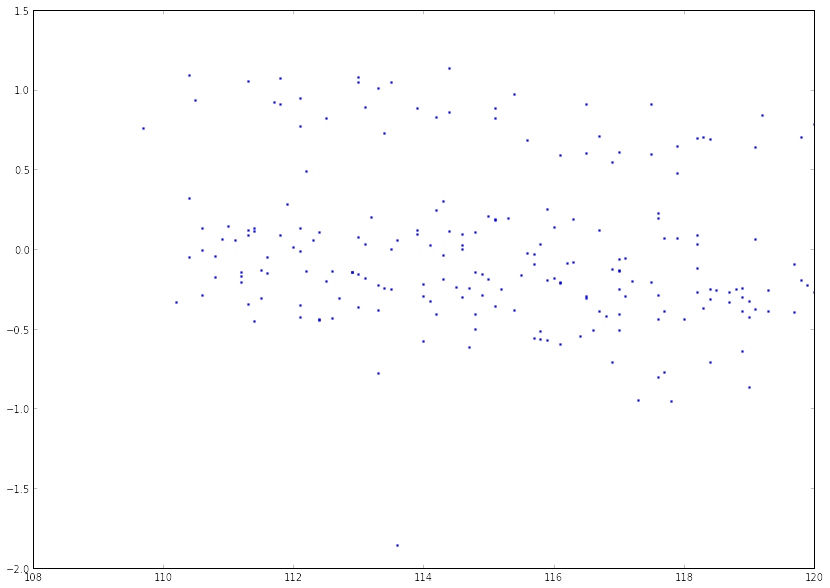

The average root-mean-squared error with this model and sample data is 0.35 volts


In [7]:
rmsErr_v, errors_v = oc.calcError(h_v.T, voltageReadings)

plt.title('Voltage Error')
plt.xlabel('Measured Voltage (V)')
plt.ylabel('Error in predicted voltage (V)')
plt.plot(voltageReadings, oc.zeros((len(voltageReadings), 1)), '-', markersize=10)
plt.plot(voltageReadings, errors_v, '.', markersize=5)
plt.show()

print("The average root-mean-squared error with this model and sample data is {0:.2f} volts".format(float(rmsErr_v)))

In [8]:
X_c, theta_c, h_c = oc.optimizeLinearModel(all_sensors[:,C_BITS], all_sensors[:, C_MEAS].T)
print("  theta_1: {}".format(float(theta_c[0])))
print("  theta_2: {}".format(float(theta_c[1])))

  theta_1: 0.02801229328
  theta_2: 0.0081431534501


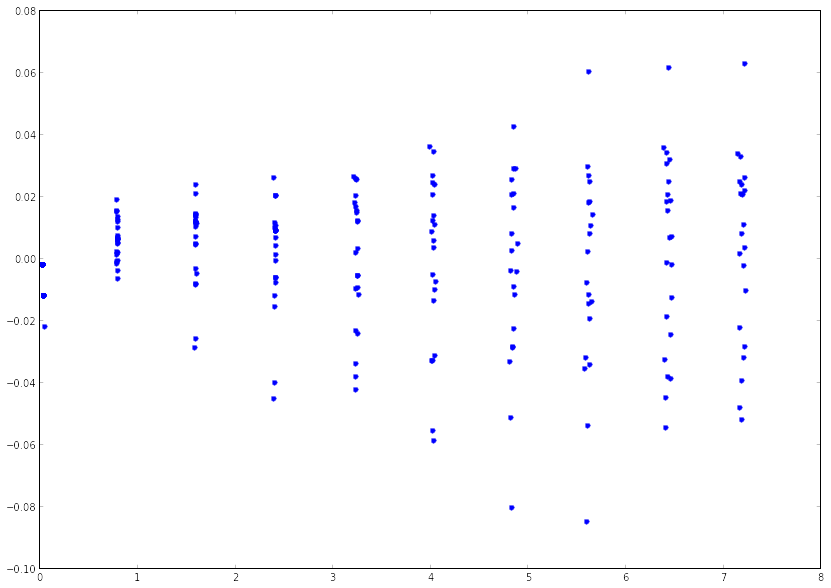

The average root-mean-squared error with this model and sample data is 0.0167 amps


In [9]:
rmsErr_c, errors_c = oc.calcError(h_c.T, all_sensors[:, C_MEAS].T)

plt.title('Current Error')
plt.xlabel('Measured Current (A)')
plt.ylabel('Error in predicted current (A)')
plt.plot(all_sensors[:, C_MEAS].T, oc.zeros((len(all_sensors[:, C_MEAS].T), 1)), '-', markersize=10)
plt.plot(all_sensors[:, C_MEAS].T, errors_c, '.', markersize=10)
plt.show()

print("The average root-mean-squared error with this model and sample data is {0:.4f} amps".format(float(rmsErr_c)))